<a href="https://colab.research.google.com/github/Untick/IrisID_gr1/blob/main/%D0%A1%D1%82%D0%B0%D0%B6%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0_%D0%A0%D0%BE%D0%BC%D0%B0%D0%BD_%D0%9F%D0%B5%D0%BD%D0%B7%D0%BE%D0%B2_01_05_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ШАГ 1.**
Для первоначального решения задачи не стал вычищать базу, а оставил только файлы формата jpg и jpeg. Некотрые папки (виды одежды) удалил целиком. На следующих шагах использую "исправленну" базу.

In [9]:
# загрузка библиотек

# методы для отрисовки изображений
from PIL import Image 

# Для отрисовки графиков
import matplotlib.pyplot as plt 

# Для генерации случайных чисел 
import random 

# Библиотека работы с массивами
import numpy as np 

# Для работы с файлами 
import os 

# импортируем модуль для загрузки данных
import gdown

# для разделения выборок
from sklearn.model_selection import train_test_split

# для создания сети
from tensorflow.keras.models import Sequential

# для создания слоев
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

# для работы с изображениями
from tensorflow.keras.preprocessing import image

# оптимизатор
from tensorflow.keras.optimizers import Adam 

# модуль для отсчета времени
import time

# Подключение к Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

# Импорт модуля для работы с архивами
import zipfile

Mounted at /content/gdrive


In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Input, UpSampling2D
from tensorflow.keras.models import Model

In [10]:
# Путь к архивному файлу
file_path = '/content/gdrive/MyDrive/test_230501.zip'

# Путь к директории, в которую нужно разархивировать файл
extract_path = '/content/selector'

# Разархивирование файла
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [11]:
# Папка с папками картинок, рассортированных по категориям
IMAGE_PATH = '/content/selector/test_230501/' 

# Получение списка папок, находящемуся по адресу в скобках
os.listdir(IMAGE_PATH) 

['dress solemn',
 'shirt men',
 't-shirt women',
 't-shirt men',
 'dress casual',
 'sportswear women',
 'dress homemade',
 'shirt women',
 'dress  business']

In [12]:
# Определение списка имен классов
CLASS_LIST = sorted(os.listdir(IMAGE_PATH))

# Определение количества классов
CLASS_COUNT = len(CLASS_LIST)

# Проверка результата
print(f'Количество классов: {CLASS_COUNT}, метки классов: {CLASS_LIST}')

Количество классов: 9, метки классов: ['dress  business', 'dress casual', 'dress homemade', 'dress solemn', 'shirt men', 'shirt women', 'sportswear women', 't-shirt men', 't-shirt women']


In [13]:
# Получения списка файлов для каждого класса

for cls in CLASS_LIST:
    print(cls, ':', os.listdir(f'{IMAGE_PATH}{cls}/'))

dress  business : ['98 (2).jpg', '40.jpg', '513 (2).jpg', '96.jpg', '113.jpg', '110.jpg', '298.jpg', '746 (3).jpg', '58.jpg', '519 (5).jpg', '205.jpg', '17711785_37388208_1000 (1).jpg', '164.jpg', '116 (3).jpg', '38 (3).jpg', '616 (4).jpg', '617 (3).jpg', '154 (3).jpg', '47.jpg', '135.jpg', '119.jpg', '18486680_40535006_1000.jpg', '987 (4).jpg', '791.jpg', '4 (5).jpg', '32 (2).jpg', '55 (2).jpg', '170 (3).jpg', '166 (3).jpg', '322 (4).jpg', '393 (3).jpg', '19631905_43774515_1000.jpg', '675 (4).jpg', '177 (4).jpg', '74.jpg', '507 (2).jpg', 'images (33).jpeg', '411 (2).jpg', '376 (3).jpg', '376 (4).jpg', '184.jpg', '380 (4).jpg', 'images (11).jpeg', '390 (3).jpg', '615 (2).jpg', '1 (3).jpg', '342 (2).jpg', '89.jpg', 'images (57).jpeg', '343 (3).jpg', '656 (2).jpg', '305 (2).jpg', '75 (2).jpg', '157.jpg', '242 (2).jpg', '339 (3).jpg', '33 (3).jpg', '269 (3).jpg', '543.jpeg', '392 (2).jpg', '335 (2).jpg', '18572872_40046775_1000.jpg', '400.jpg', '284.jpg', '373 (4).jpg', '539 (3).jpg', '26

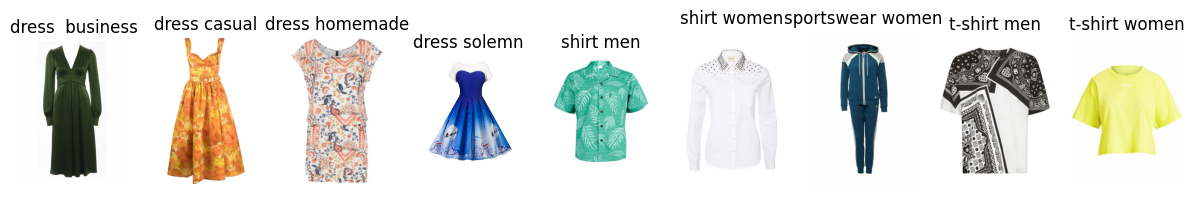

In [18]:
# Отобразим визуально для примера по одному изображению из каждого класса
# Создание заготовки для изображений всех классов
fig, axs = plt.subplots(1, CLASS_COUNT, figsize=(15, 15))

# Для всех номеров классов:
for i in range(CLASS_COUNT):

    # Формирование пути к папке содержимого класса
    car_path = f'{IMAGE_PATH}{CLASS_LIST[i]}/'

    # Выбор случайного фото из i-го класса
    img_path = car_path + random.choice(os.listdir(car_path)) 
    
    # Отображение фотографии (подробнее будет объяснено далее)
    axs[i].set_title(CLASS_LIST[i])
    axs[i].imshow(Image.open(img_path))  
    axs[i].axis('off')

# Отрисовка всего полотна
plt.show()